see https://github.com/AdityaGogoi/LSTM-to-predict-Google-stock-prices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Just predicting the "Open Stock Price" for Google. So extracting 1 column.
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [7]:
training_set.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [8]:
# Getting just the Open Stock Price for input of our RNN.
# To convert the Vector form of a single column into a Matrix form, we will use 1:2 as the column index. 
# The 2nd column will be ignored and we will get our Open Stock Price Column in a Matrix form.
# Output will be a 2d Numpy array, exactly what we want.
train_set_open = training_set.iloc[:,1:2]
train_set_open

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [9]:
training_set = train_set_open.values

In [10]:
# Feature Scaling
# Will use Normalisation as the Scaling function.
# Default range for MinMaxScaler is 0 to 1, which is what we want. So no arguments in it.
 # Will fit the training set to it and get it scaled and replace the original set.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [14]:
pd.DataFrame(training_set).describe()

,0
count,1258.000000
mean,0.473603
std,0.282581
min,0.000000
25%,0.232523
50%,0.480598
75%,0.699089
max,1.000000


In [15]:
training_set.shape

(1258, 1)

In [16]:
# Getting the inputs and the ouputs
# Restricting the input and output based on how LSTM functions.
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [17]:
# Reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (1257, 1, 1))

In [18]:
X_train.shape

(1257, 1, 1)

In [19]:
y_train.shape

(1257, 1)

### Part 2 - Building the RNN

In [20]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [21]:
# Initialising the RNN
# Creating an object of Sequential class to create the RNN.
regressor = Sequential()

# Adding the input layer and the LSTM layer
# 4 memory units, sigmoid activation function and (None time interval with 1 attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
# 1 nueron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
X_train.shape

(1257, 1, 1)

In [22]:
# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 0s 332us/step - loss: 0.1113
Epoch 2/200
1257/1257 [==============================] - 0s 61us/step - loss: 0.0914
Epoch 3/200
1257/1257 [==============================] - 0s 62us/step - loss: 0.0850
Epoch 4/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.0827
Epoch 5/200
1257/1257 [==============================] - 0s 51us/step - loss: 0.0811
Epoch 6/200
1257/1257 [==============================] - 0s 47us/step - loss: 0.0794
Epoch 7/200
1257/1257 [==============================] - 0s 201us/step - loss: 0.0778
Epoch 8/200
1257/1257 [==============================] - 0s 84us/step - loss: 0.0761
Epoch 9/200
1257/1257 [==============================] - 0s 62us/step - loss: 0.0744
Epoch 10/200
1257/1257 [==============================] - 0s 56us/step - loss: 0.0727
Epoch 11/200
1257/1257 [==============================] - 0s 120us/step - loss: 0.0709
Epoch 12/200
1257/1257 [==============================] - 0s

1257/1257 [==============================] - 0s 88us/step - loss: 2.5686e-04
Epoch 95/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.5813e-04
Epoch 96/200
1257/1257 [==============================] - 0s 55us/step - loss: 2.5864e-04
Epoch 97/200
1257/1257 [==============================] - 0s 48us/step - loss: 2.5956e-04
Epoch 98/200
1257/1257 [==============================] - 0s 45us/step - loss: 2.5977e-04
Epoch 99/200
1257/1257 [==============================] - 0s 47us/step - loss: 2.5798e-04
Epoch 100/200
1257/1257 [==============================] - 0s 52us/step - loss: 2.5691e-04
Epoch 101/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.6261e-04
Epoch 102/200
1257/1257 [==============================] - 0s 144us/step - loss: 2.5755e-04
Epoch 103/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.6041e-04
Epoch 104/200
1257/1257 [==============================] - 0s 48us/step - loss: 2.5665e-04
Epoch 105/200
125

1257/1257 [==============================] - 0s 138us/step - loss: 2.5444e-04
Epoch 184/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.5287e-04
Epoch 185/200
1257/1257 [==============================] - 0s 245us/step - loss: 2.5580e-04
Epoch 186/200
1257/1257 [==============================] - 0s 189us/step - loss: 2.6321e-04
Epoch 187/200
1257/1257 [==============================] - 0s 137us/step - loss: 2.5453e-04
Epoch 188/200
 736/1257 [================>.............] - ETA: 0s - loss: 2.6593e-04

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.123664). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1257/1257 [==============================] - 0s 337us/step - loss: 2.5591e-04
Epoch 189/200
1257/1257 [==============================] - 0s 109us/step - loss: 2.5296e-04
Epoch 190/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.5599e-04
Epoch 191/200
1257/1257 [==============================] - 0s 129us/step - loss: 2.5685e-04
Epoch 192/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.5566e-04
Epoch 193/200
1257/1257 [==============================] - 0s 102us/step - loss: 2.5445e-04
Epoch 194/200
1257/1257 [==============================] - 0s 83us/step - loss: 2.5749e-04
Epoch 195/200
1257/1257 [==============================] - 0s 111us/step - loss: 2.5307e-04
Epoch 196/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5597e-04
Epoch 197/200
1257/1257 [==============================] - 0s 196us/step - loss: 2.5570e-04
Epoch 198/200
1257/1257 [==============================] - 0s 142us/step - loss: 2.5356e-04
Epoch

### Part 3 - Making the predictions and visualising the results

In [23]:
# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [25]:
real_stock_price.shape

(20, 1)

In [27]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

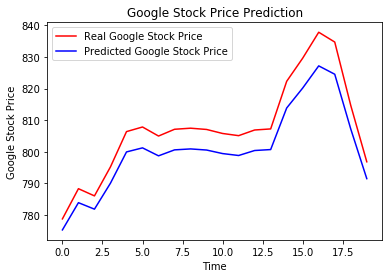

In [28]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [29]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

6.900446002734877